In [2]:
import pandas as pd

df = pd.read_csv("supermarket_sales.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
import numpy as np
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
total_np = df[["Total"]].to_numpy()
media_total = total_np.mean()

In [8]:
media_total

322.966749

In [4]:
df["Total"].sum()

322966.749

In [3]:
#Ticket promedio por item
resultado = df.groupby("Product line")["Total"].mean().reset_index()
resultado = resultado.rename(columns={"Total": "Promedio"})
total_ventas = df["Total"].sum()
resultado.loc[len(resultado)] = ["Total", total_ventas]
resultado["Promedio"] = resultado["Promedio"].map("{:.2f}".format)
resultado

,Product line,Promedio
0,Electronic accessories,319.63
1,Fashion accessories,305.09
2,Food and beverages,322.67
3,Health and beauty,323.64
4,Home and lifestyle,336.64
5,Sports and travel,332.07
6,Total,322966.75


In [34]:
resultado = df.groupby(["Product line"])["Total"].mean().reset_index().rename(columns={"Total": "Promedio"})
resultado["Aporte"] = df["Total"].sum()
resultado["Promedio"] = resultado["Promedio"].map('{:.2f}'.format)
resultado["Aporte"] = resultado["Aporte"].map('{:.2f}'.format)
print(resultado)


             Product line Promedio     Aporte
0  Electronic accessories   319.63  322966.75
1     Fashion accessories   305.09  322966.75
2      Food and beverages   322.67  322966.75
3       Health and beauty   323.64  322966.75
4      Home and lifestyle   336.64  322966.75
5       Sports and travel   332.07  322966.75


In [201]:
resultado = df.groupby(["Product line"])["Total"].mean().reset_index().rename(columns={"Total": "Promedio"}).sort_values(by="Promedio", ascending=False)
total= df.groupby("Product line")["Total"].sum().reset_index().rename(columns={"Total": "Total ventas"}).sort_values(by="Total ventas", ascending=False)


resultado.style.format({"Promedio": "{:.2f}"})


,Product line,Promedio
4,Home and lifestyle,336.64
5,Sports and travel,332.07
3,Health and beauty,323.64
2,Food and beverages,322.67
0,Electronic accessories,319.63
1,Fashion accessories,305.09


In [75]:
total.style.format({"Total ventas": "{:.2f}"})

,Product line,Total ventas
2,Food and beverages,56144.84
5,Sports and travel,55122.83
0,Electronic accessories,54337.53
1,Fashion accessories,54305.89
4,Home and lifestyle,53861.91
3,Health and beauty,49193.74


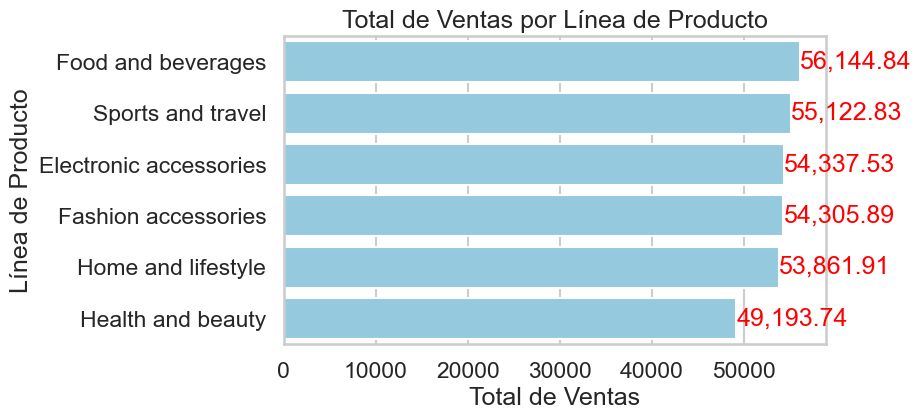

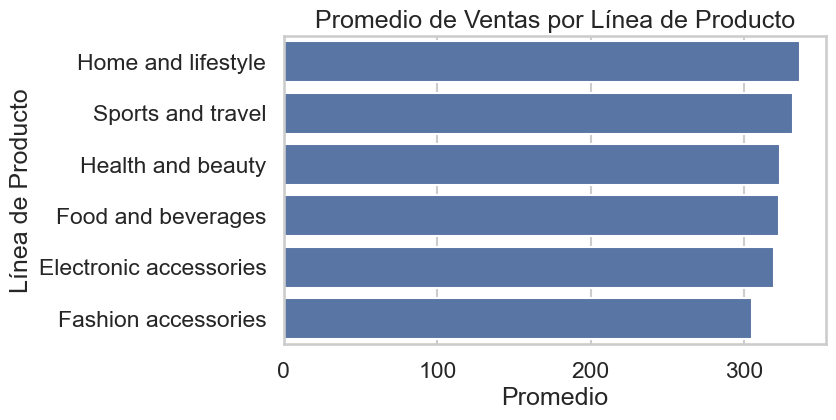

In [204]:
# Gráfica del total de ventas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
ax = sns.barplot(x="Total ventas", y="Product line", data=total, color="skyblue")
for index, value in enumerate(total["Total ventas"]):
    ax.text(value, index, f'{value:,.2f}', color='red', va="center")

plt.xlabel('Total de Ventas')
plt.ylabel('Línea de Producto')
plt.title('Total de Ventas por Línea de Producto')
plt.grid(True, axis='x')
plt.show()

# Gráfica del promedio de ventas
plt.figure(figsize=(7, 4))
sns.barplot(x="Promedio", y="Product line", data=resultado)
plt.xlabel('Promedio')
plt.ylabel('Línea de Producto')
plt.title('Promedio de Ventas por Línea de Producto')
plt.grid(True, axis='x')
plt.show()

In [63]:
df["Total"].sum()

322966.749

In [64]:
df["Total"].mean()

322.966749

In [83]:
resultado = df.groupby(["Date"])["Total"].mean().reset_index().rename(columns={"Total": "Promedio"})
total= df.groupby("Date")["Total"].sum().reset_index().rename(columns={"Total": "Total ventas"}).sort_values(by="Total ventas", ascending=False)[:10]

In [84]:
total.style.format({"Total": "{:.2f}"})

,Date,Total ventas
88,3/9/2019,7474.047000
56,2/7/2019,7228.210500
64,3/14/2019,7214.634000
37,2/15/2019,6830.785500
70,3/2/2019,6560.305500
84,3/5/2019,6230.878500
15,1/23/2019,5994.187500
6,1/15/2019,5944.260000
50,2/27/2019,5859.451500
69,3/19/2019,5740.392000


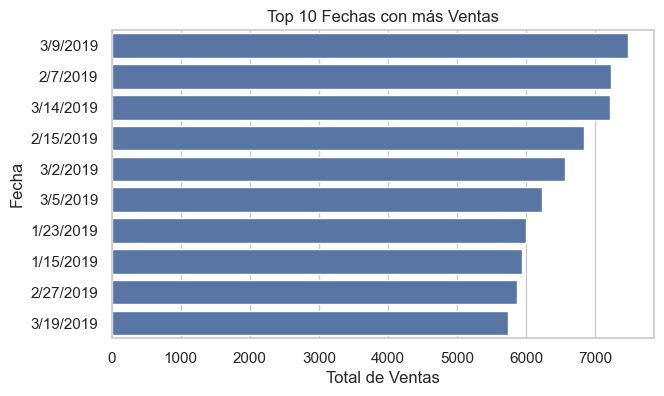

In [86]:
plt.figure(figsize=(7, 4))
sns.barplot(x="Total ventas", y="Date", data=total)
plt.xlabel('Total de Ventas')
plt.ylabel('Fecha')
plt.title('Top 10 Fechas con más Ventas')
plt.grid(True, axis='x')
plt.show()

In [90]:
# Asegúrate de que la columna "Date" esté en formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# Extrae el mes de la columna "Date" y crea una nueva columna "Month"
df["Month"] = df["Date"].dt.month

# Diccionario para mapear los números de los meses a los nombres de los meses
month_names = {1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"}

# Mapear los números de los meses a los nombres de los meses
df["Month"] = df["Month"].map(month_names)

# Agrupa por la nueva columna "Month", suma la columna "Total" y ordena
total = df.groupby("Month")["Total"].sum().reset_index().rename(columns={"Total": "Total ventas"}).sort_values(by="Total ventas", ascending=False)[:10]

In [95]:
total.style.format({"Total ventas": "{:.2f}"})

,Month,Total ventas
0,Enero,116291.87
2,Marzo,109455.51
1,Febrero,97219.37


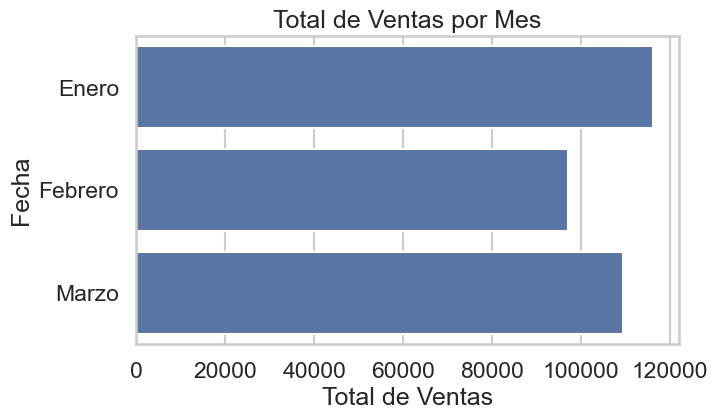

In [117]:
plt.figure(figsize=(7, 4))
sns.barplot(x="Total ventas", y="Month", data=total)
plt.xlabel('Total de Ventas')
plt.ylabel('Fecha')
plt.title('Total de Ventas por Mes')
plt.grid(True, axis='x')
plt.show()

In [166]:
total= df.groupby("Month")["Total"].sum().reset_index().rename(columns={"Total": "Total ventas"}).sort_values(by="Month", ascending=True)

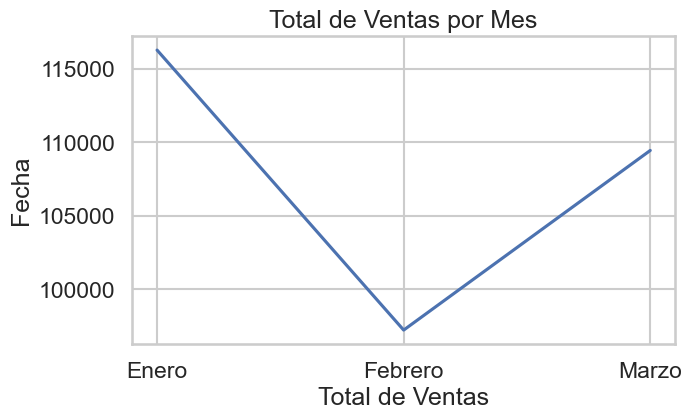

In [168]:
plt.figure(figsize=(7, 4))
sns.lineplot(x="Month", y="Total ventas", data=total)
plt.xlabel('Total de Ventas')
plt.ylabel('Fecha')
plt.title('Total de Ventas por Mes')
plt.grid(True, axis='x')
plt.show()

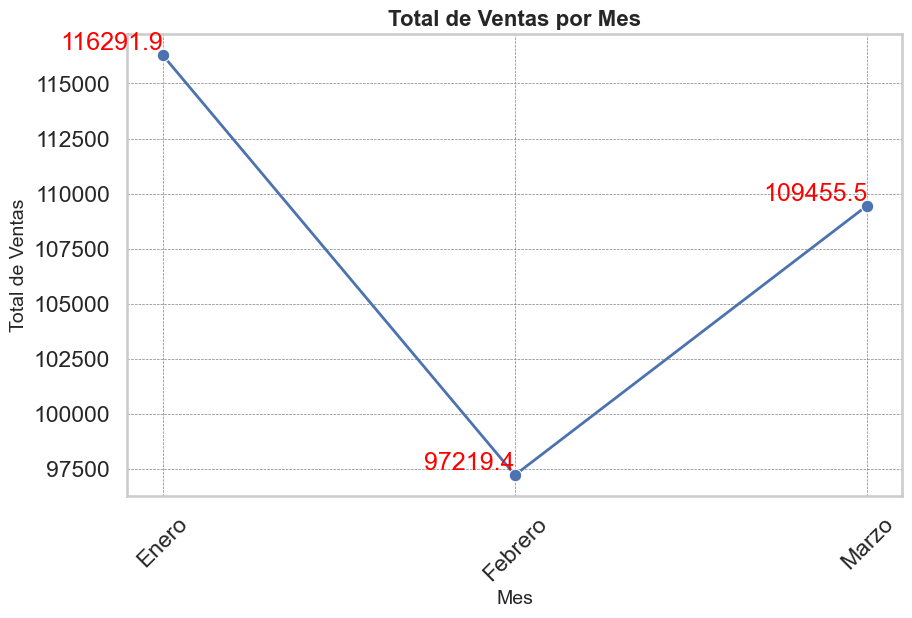

In [121]:
# Cambia el estilo y el contexto
sns.set(style="whitegrid", context="talk")

# Crea la figura y el gráfico de líneas
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x="Month", y="Total ventas", data=total, marker='o', color='b', linewidth=2)

# Añade anotaciones de los valores en los puntos
for x, y in zip(total["Month"], total["Total ventas"]):
    plt.text(x, y, f'{y:.1f}', horizontalalignment='right', verticalalignment='bottom', color="red")

# Ajusta las etiquetas de los ejes y el título
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Total de Ventas', fontsize=14)
plt.title('Total de Ventas por Mes', fontsize=16, fontweight='bold')

# Ajusta el diseño de la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [126]:
total= df.groupby(["Customer type", "Month"])["Total"].sum().reset_index().rename(columns={"Total": "Total ventas"}).sort_values(by="Month", ascending=True)

In [124]:
total

,Customer type,Month,Total ventas
0,Member,Enero,57914.829
3,Normal,Enero,58377.039
1,Member,Febrero,50296.050
4,Normal,Febrero,46923.324
2,Member,Marzo,56012.565
5,Normal,Marzo,53442.942


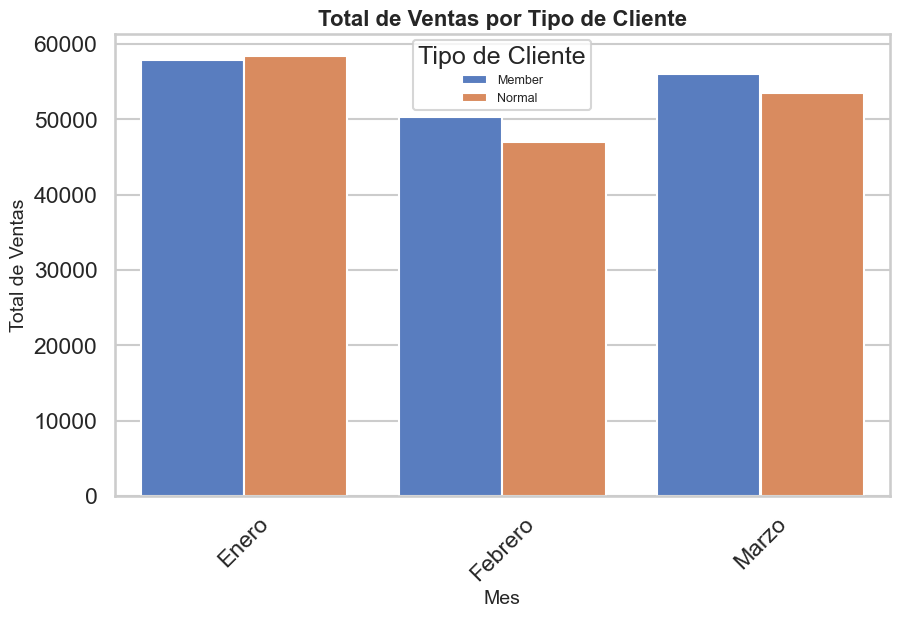

In [150]:
# Cambia el estilo y el contexto
sns.set(style="whitegrid", context="talk")

# Crea la figura y el gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Month", y="Total ventas", hue="Customer type", data=total, palette="muted")

# Ajusta las etiquetas de los ejes y el título
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Total de Ventas', fontsize=14)
plt.title('Total de Ventas por Tipo de Cliente', fontsize=16, fontweight='bold')


# Mostrar el gráfico
plt.legend(title='Tipo de Cliente', loc='upper center', prop={'size': 9})
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

In [170]:
total= df.groupby(["Product line", "Month"])["Total"].sum().reset_index().rename(columns={"Total": "Total ventas"}).sort_values(by="Total ventas", ascending=False)
total

,Product line,Month,Total ventas
15,Sports and travel,Enero,21667.0230
14,Home and lifestyle,Marzo,20932.7895
12,Home and lifestyle,Enero,20494.7400
7,Food and beverages,Febrero,20000.3580
17,Sports and travel,Marzo,19646.1930
6,Food and beverages,Enero,19570.5300
3,Fashion accessories,Enero,19345.1160
4,Fashion accessories,Febrero,19009.8615
0,Electronic accessories,Enero,18831.2880
11,Health and beauty,Marzo,18208.3125


In [171]:
# Filtrar y ordenar los datos para cada mes
top_items_por_mes = total.groupby("Month").apply(lambda x: x.nlargest(10, "Total ventas")).reset_index(drop=True)

# Mostrar el reporte
print("Reporte de los ítems más vendidos (TOP 10) por mes:\n")
for month, month_data in top_items_por_mes.groupby("Month"):
    print(f"Mes: {month}")
    print(month_data[["Product line", "Total ventas"]])
    print("\n")

Reporte de los ítems más vendidos (TOP 10) por mes:

Mes: Enero
             Product line  Total ventas
0       Sports and travel     21667.023
1      Home and lifestyle     20494.740
2      Food and beverages     19570.530
3     Fashion accessories     19345.116
4  Electronic accessories     18831.288
5       Health and beauty     16383.171


Mes: Febrero
              Product line  Total ventas
6       Food and beverages    20000.3580
7      Fashion accessories    19009.8615
8   Electronic accessories    17362.9050
9        Health and beauty    14602.2555
10       Sports and travel    13809.6105
11      Home and lifestyle    12434.3835


Mes: Marzo
              Product line  Total ventas
12      Home and lifestyle    20932.7895
13       Sports and travel    19646.1930
14       Health and beauty    18208.3125
15  Electronic accessories    18143.3385
16      Food and beverages    16573.9560
17     Fashion accessories    15950.9175




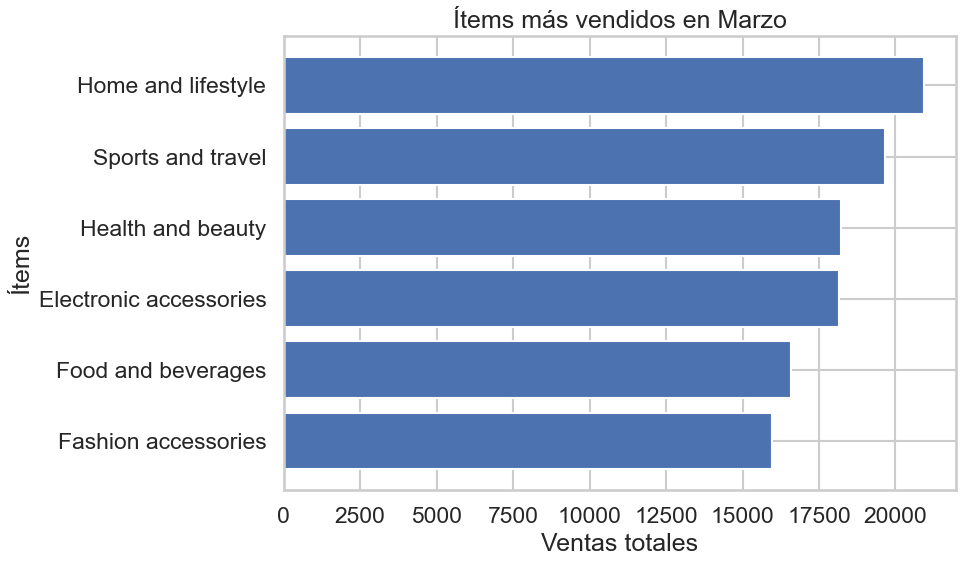

In [199]:
# Filtrar los datos solo para enero
top_items_enero = top_items_por_mes[top_items_por_mes["Month"] == "Marzo"]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los ítems más vendidos (TOP 10) en enero
ax.barh(top_items_enero["Product line"], top_items_enero["Total ventas"])
ax.set_title('Ítems más vendidos en Marzo')
ax.set_xlabel('Ventas totales')
ax.set_ylabel('Ítems')
ax.invert_yaxis()  # Invertir el eje y para que el ítem más vendido esté en la parte superior

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [188]:
total= df.groupby("Product line")["Quantity"].sum().reset_index().rename(columns={"Quantity": "Unidades vendidas"}).sort_values(by="Unidades vendidas", ascending=False)
#total= df.groupby("Product line")["Total"].sum().reset_index().rename(columns={"Total": "Total ventas"}).sort_values(by="Total ventas", ascending=False)

total.style.format({"Unidades vendidas": "{:.2f}"})

,Product line,Unidades vendidas
0,Electronic accessories,971.00
2,Food and beverages,952.00
5,Sports and travel,920.00
4,Home and lifestyle,911.00
1,Fashion accessories,902.00
3,Health and beauty,854.00


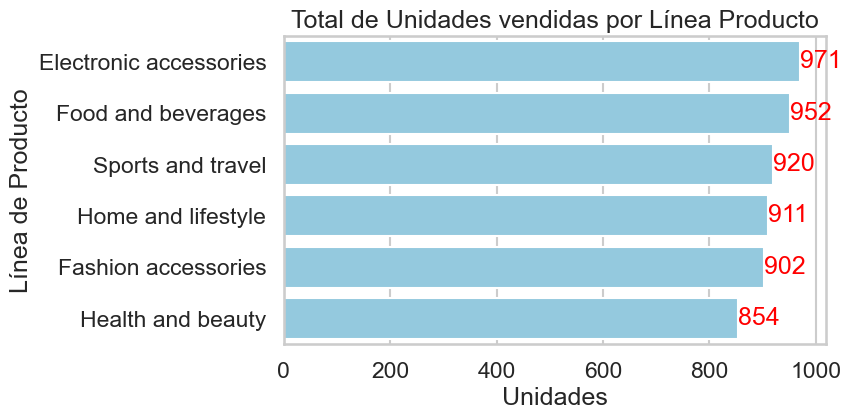

In [198]:
# Crear la gráfica
plt.figure(figsize=(7, 4))
ax = sns.barplot(x="Unidades vendidas", y="Product line", data=total, color="skyblue")

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', color="red")

# Ajustes de la gráfica
plt.xlabel('Unidades')
plt.ylabel('Línea de Producto')
plt.title('Total de Unidades vendidas por Línea Producto')
plt.grid(True, axis='x')
plt.show()